In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")


Task-6A: Please use the latest version of the AD dataset to provide the following outputs:
y-CDRGLOB
X: all columns except for the label
Train-test split: 80,20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross-validation step by k=5 and k=10


In [3]:
X = data.drop(['CDRGLOB'], axis=1)
Y = data["CDRGLOB"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=0,train_size=0.8)
model=GaussianNB()

In [4]:
y2_model = model.fit(Xtrain, Ytrain).predict(Xtest)
y1_model = model.fit(Xtest, Ytest).predict(Xtrain)
accuracy_score(Ytrain, y1_model), accuracy_score(Ytest, y2_model)

(0.6241920590951062, 0.6789667896678967)

In [5]:
cross_val_score(model, X, Y, cv=5)

array([0.63099631, 0.63837638, 0.65682657, 0.55350554, 0.57407407])

In [6]:
cross_val_score(model, X, Y, cv=10)

array([0.625     , 0.60294118, 0.52941176, 0.72794118, 0.65925926,
       0.6962963 , 0.6962963 , 0.42962963, 0.51111111, 0.66666667])

In [7]:
print("Cross-Validation's mean with k=5:",cross_val_score(model, X, Y, cv=5).mean())
print("Cross-Validation's mean with k=10:",cross_val_score(model, X, Y, cv=10).mean())

Cross-Validation's mean with k=5: 0.610755774224409
Cross-Validation's mean with k=10: 0.6144553376906319


Task-6B: TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values. 

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [16]:
model_rfc= RandomForestClassifier(n_estimators=100)
model_rfc.fit(Xtrain, Ytrain)
ymodel_rfc = model_rfc.predict(Xtest)
print("The accuracy of the model relative to Random Forest Classifier",accuracy_score(Ytest, ymodel_rfc))

The accuracy of the model relative to Random Forest Classifier 0.7011070110701108


In [48]:
param_grid={'bootstrap': [True,False],
    'max_depth': [10,25,50,75,90],
    'max_features': [2, 3,4,5,6],
    'min_samples_split': [3,5,8, 10, 12],
    }

grid_search = GridSearchCV(estimator =model_rfc, param_grid = param_grid, cv = 5, n_jobs = -1,verbose=1)
grid_search.fit(Xtrain, Ytrain)
ymodel_gs = grid_search.predict(Xtest)
print("The accuracy of the model relative to Grid Search",accuracy_score(Ytest, ymodel_gs))


Fitting 5 folds for each of 250 candidates, totalling 1250 fits
The accuracy of the model relative to Grid Search 0.6863468634686347


When we compare two different results between Random Forest Classifier and Grid Search, the Random Forest Classifier one is better.

In [49]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_split': 3}

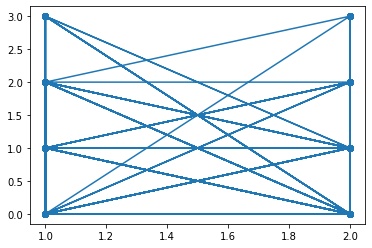

In [61]:
rfc=grid_search.best_estimator_

plt.scatter(X.SEX, Y)
lim = plt.axis()
Ytest = model.fit(X, Y).predict(Xtest)
plt.plot(Xtest.SEX, Ytest);
plt.axis(lim);

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.


In [62]:
predictions = rfc.fit(Xtrain,Ytrain).predict(Xtest)

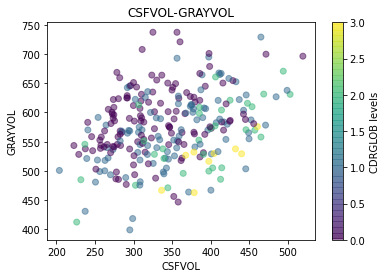

In [84]:
plt.scatter(Xtest["CSFVOL"], Xtest["GRAYVOL"],c=Ytest,alpha=0.5)
plt.title("CSFVOL-GRAYVOL")
plt.colorbar(label="CDRGLOB levels")
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();

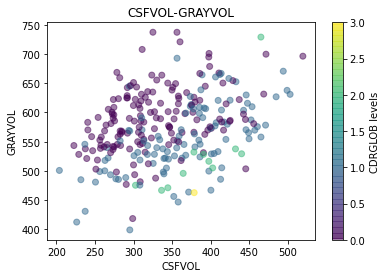

In [87]:
plt.scatter(Xtest["CSFVOL"], Xtest["GRAYVOL"],c=predictions,alpha=0.5)
plt.title("CSFVOL-GRAYVOL")
plt.colorbar(label="CDRGLOB levels")
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions.Then provide a visualization with respect to these dimensions. 

In [105]:
from sklearn.manifold import Isomap

Text(0, 0.5, 'Feature_2')

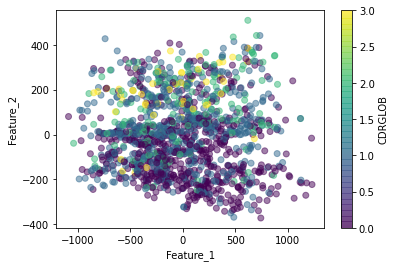

In [107]:
iso = Isomap(n_components=2)
iso.fit(X)
isomap_data = iso.transform(X)

plt.scatter(isomap_data[:, 0], isomap_data[:, 1],c=Y,alpha=0.5)
plt.colorbar(label='CDRGLOB')
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")


TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 


In [108]:
from sklearn.cluster import KMeans

In [111]:
K_means = KMeans(n_clusters = 3, random_state=0)
clusters = K_means.fit_predict(X)


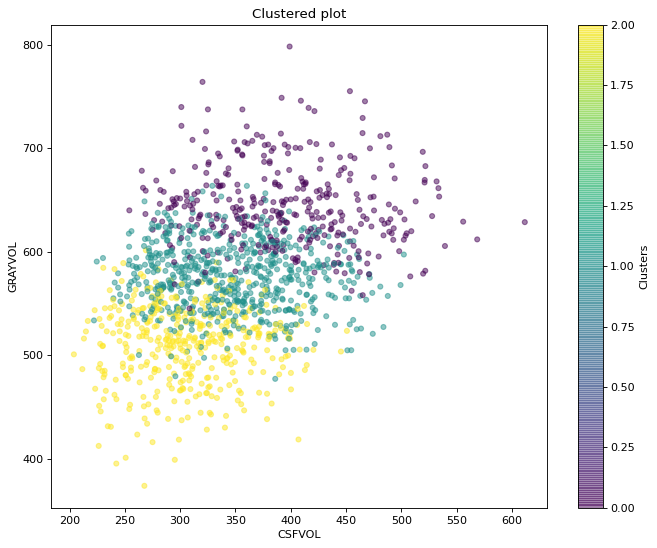

In [112]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X["CSFVOL"], X["GRAYVOL"],c=clusters, s=20,alpha=0.5)
plt.title("Clustered plot")
plt.colorbar(label="Clusters")
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();